In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('time_series_covid_19_confirmed.csv')


In [5]:
df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993


In [6]:
df.drop(['Province/State','Country/Region','Lat','Long'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 467 entries, 1/22/20 to 5/2/21
dtypes: int64(467)
memory usage: 1003.4 KB


In [11]:
dataset = df.copy()
X = np.asarray(dataset.drop('5/2/21',1))
y = np.asarray(dataset['5/2/21'])
sc = StandardScaler()
X_normalized = sc.fit_transform(X)

In [93]:
numDims = X_normalized.shape[1]
dnnModel = tf.keras.Sequential([
    layers.Dense(16,activation='relu',input_shape= (numDims,)),
    layers.Dense(16,activation = 'relu'),
    layers.Dense(126,activation = 'relu'),
    layers.Dense(160,activation = 'relu'),
    layers.Dense(10,activation = 'relu'),
    layers.Dense(1)
    
])
optimizer = tf.keras.optimizers.RMSprop(0.0001)
dnnModel.compile(loss = 'mse',optimizer=optimizer,metrics=['mae','mse'])

In [94]:
dnnModel.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 16)                7472      
_________________________________________________________________
dense_67 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_68 (Dense)             (None, 126)               2142      
_________________________________________________________________
dense_69 (Dense)             (None, 160)               20320     
_________________________________________________________________
dense_70 (Dense)             (None, 10)                1610      
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 31,827
Trainable params: 31,827
Non-trainable params: 0
_________________________________________________

In [98]:
epochs = 400
history = dnnModel.fit(X_normalized,y,epochs = epochs , validation_split = 0.2)

Epoch 1/400
7/7 [==============================] - 0s 7ms/step - loss: 3385921110016.0000 - mae: 445035.7188 - mse: 3385921110016.0000 - val_loss: 20304518709248.0000 - val_mae: 992520.4375 - val_mse: 20304518709248.0000
Epoch 2/400
7/7 [==============================] - 0s 4ms/step - loss: 3385920061440.0000 - mae: 445035.5938 - mse: 3385920061440.0000 - val_loss: 20304512417792.0000 - val_mae: 992520.1875 - val_mse: 20304512417792.0000
Epoch 3/400
7/7 [==============================] - 0s 4ms/step - loss: 3385920061440.0000 - mae: 445035.5312 - mse: 3385920061440.0000 - val_loss: 20304508223488.0000 - val_mae: 992520.0625 - val_mse: 20304508223488.0000
Epoch 4/400
7/7 [==============================] - 0s 3ms/step - loss: 3385919799296.0000 - mae: 445035.4062 - mse: 3385919799296.0000 - val_loss: 20304504029184.0000 - val_mae: 992519.8750 - val_mse: 20304504029184.0000
Epoch 5/400
7/7 [==============================] - 0s 4ms/step - loss: 3385918488576.0000 - mae: 445035.2812 - mse: 

Epoch 38/400
7/7 [==============================] - 0s 3ms/step - loss: 3385898041344.0000 - mae: 445031.3438 - mse: 3385898041344.0000 - val_loss: 20304329965568.0000 - val_mae: 992513.5000 - val_mse: 20304329965568.0000
Epoch 39/400
7/7 [==============================] - 0s 3ms/step - loss: 3385897254912.0000 - mae: 445031.2500 - mse: 3385897254912.0000 - val_loss: 20304325771264.0000 - val_mae: 992513.3750 - val_mse: 20304325771264.0000
Epoch 40/400
7/7 [==============================] - 0s 3ms/step - loss: 3385896992768.0000 - mae: 445031.0938 - mse: 3385896992768.0000 - val_loss: 20304319479808.0000 - val_mae: 992513.1875 - val_mse: 20304319479808.0000
Epoch 41/400
7/7 [==============================] - 0s 3ms/step - loss: 3385895682048.0000 - mae: 445030.9375 - mse: 3385895682048.0000 - val_loss: 20304315285504.0000 - val_mae: 992513.0000 - val_mse: 20304315285504.0000
Epoch 42/400
7/7 [==============================] - 0s 3ms/step - loss: 3385895157760.0000 - mae: 445030.8750 - 

Epoch 75/400
7/7 [==============================] - 0s 4ms/step - loss: 3385872089088.0000 - mae: 445026.3750 - mse: 3385872089088.0000 - val_loss: 20304118153216.0000 - val_mae: 992505.7500 - val_mse: 20304118153216.0000
Epoch 76/400
7/7 [==============================] - 0s 4ms/step - loss: 3385871564800.0000 - mae: 445026.2500 - mse: 3385871564800.0000 - val_loss: 20304113958912.0000 - val_mae: 992505.5000 - val_mse: 20304113958912.0000
Epoch 77/400
7/7 [==============================] - 0s 4ms/step - loss: 3385870778368.0000 - mae: 445026.0625 - mse: 3385870778368.0000 - val_loss: 20304109764608.0000 - val_mae: 992505.3750 - val_mse: 20304109764608.0000
Epoch 78/400
7/7 [==============================] - 0s 3ms/step - loss: 3385869467648.0000 - mae: 445025.9375 - mse: 3385869467648.0000 - val_loss: 20304103473152.0000 - val_mae: 992505.0625 - val_mse: 20304103473152.0000
Epoch 79/400
7/7 [==============================] - 0s 4ms/step - loss: 3385868943360.0000 - mae: 445025.8125 - 

Epoch 112/400
7/7 [==============================] - 0s 3ms/step - loss: 3385841418240.0000 - mae: 445020.5938 - mse: 3385841418240.0000 - val_loss: 20303872786432.0000 - val_mae: 992496.5625 - val_mse: 20303872786432.0000
Epoch 113/400
7/7 [==============================] - 0s 3ms/step - loss: 3385840369664.0000 - mae: 445020.4375 - mse: 3385840369664.0000 - val_loss: 20303864397824.0000 - val_mae: 992496.3750 - val_mse: 20303864397824.0000
Epoch 114/400
7/7 [==============================] - 0s 3ms/step - loss: 3385839583232.0000 - mae: 445020.2188 - mse: 3385839583232.0000 - val_loss: 20303858106368.0000 - val_mae: 992496.0625 - val_mse: 20303858106368.0000
Epoch 115/400
7/7 [==============================] - 0s 3ms/step - loss: 3385839321088.0000 - mae: 445020.1562 - mse: 3385839321088.0000 - val_loss: 20303849717760.0000 - val_mae: 992495.8125 - val_mse: 20303849717760.0000
Epoch 116/400
7/7 [==============================] - 0s 3ms/step - loss: 3385837486080.0000 - mae: 445019.93

Epoch 149/400
7/7 [==============================] - 0s 3ms/step - loss: 3385805766656.0000 - mae: 445014.0000 - mse: 3385805766656.0000 - val_loss: 20303587573760.0000 - val_mae: 992486.0625 - val_mse: 20303587573760.0000
Epoch 150/400
7/7 [==============================] - 0s 3ms/step - loss: 3385805504512.0000 - mae: 445013.8125 - mse: 3385805504512.0000 - val_loss: 20303581282304.0000 - val_mae: 992485.8125 - val_mse: 20303581282304.0000
Epoch 151/400
7/7 [==============================] - 0s 3ms/step - loss: 3385804193792.0000 - mae: 445013.5938 - mse: 3385804193792.0000 - val_loss: 20303570796544.0000 - val_mae: 992485.4375 - val_mse: 20303570796544.0000
Epoch 152/400
7/7 [==============================] - 0s 3ms/step - loss: 3385803145216.0000 - mae: 445013.3750 - mse: 3385803145216.0000 - val_loss: 20303564505088.0000 - val_mae: 992485.1875 - val_mse: 20303564505088.0000
Epoch 153/400
7/7 [==============================] - 0s 3ms/step - loss: 3385801834496.0000 - mae: 445013.18

Epoch 186/400
7/7 [==============================] - 0s 3ms/step - loss: 3385764610048.0000 - mae: 445006.2500 - mse: 3385764610048.0000 - val_loss: 20303249932288.0000 - val_mae: 992473.6250 - val_mse: 20303249932288.0000
Epoch 187/400
7/7 [==============================] - 0s 3ms/step - loss: 3385763561472.0000 - mae: 445006.0938 - mse: 3385763561472.0000 - val_loss: 20303239446528.0000 - val_mae: 992473.3125 - val_mse: 20303239446528.0000
Epoch 188/400
7/7 [==============================] - 0s 4ms/step - loss: 3385762250752.0000 - mae: 445005.8438 - mse: 3385762250752.0000 - val_loss: 20303233155072.0000 - val_mae: 992472.9375 - val_mse: 20303233155072.0000
Epoch 189/400
7/7 [==============================] - 0s 4ms/step - loss: 3385761202176.0000 - mae: 445005.5938 - mse: 3385761202176.0000 - val_loss: 20303222669312.0000 - val_mae: 992472.6250 - val_mse: 20303222669312.0000
Epoch 190/400
7/7 [==============================] - 0s 3ms/step - loss: 3385759891456.0000 - mae: 445005.37

7/7 [==============================] - 0s 3ms/step - loss: 3385666043904.0000 - mae: 444988.2188 - mse: 3385666043904.0000 - val_loss: 20302450917376.0000 - val_mae: 992444.5625 - val_mse: 20302450917376.0000
Epoch 259/400
7/7 [==============================] - 0s 3ms/step - loss: 3385664471040.0000 - mae: 444987.9375 - mse: 3385664471040.0000 - val_loss: 20302440431616.0000 - val_mae: 992444.0625 - val_mse: 20302440431616.0000
Epoch 260/400
7/7 [==============================] - 0s 4ms/step - loss: 3385663160320.0000 - mae: 444987.6250 - mse: 3385663160320.0000 - val_loss: 20302427848704.0000 - val_mae: 992443.6875 - val_mse: 20302427848704.0000
Epoch 261/400
7/7 [==============================] - 0s 3ms/step - loss: 3385661063168.0000 - mae: 444987.3750 - mse: 3385661063168.0000 - val_loss: 20302415265792.0000 - val_mae: 992443.1250 - val_mse: 20302415265792.0000
Epoch 262/400
7/7 [==============================] - 0s 4ms/step - loss: 3385659490304.0000 - mae: 444987.0312 - mse: 3385

Epoch 331/400
7/7 [==============================] - 0s 4ms/step - loss: 3385536282624.0000 - mae: 444964.9375 - mse: 3385536282624.0000 - val_loss: 20301396049920.0000 - val_mae: 992407.0000 - val_mse: 20301396049920.0000
Epoch 332/400
7/7 [==============================] - 0s 3ms/step - loss: 3385534185472.0000 - mae: 444964.5938 - mse: 3385534185472.0000 - val_loss: 20301379272704.0000 - val_mae: 992406.3125 - val_mse: 20301379272704.0000
Epoch 333/400
7/7 [==============================] - 0s 3ms/step - loss: 3385531826176.0000 - mae: 444964.1562 - mse: 3385531826176.0000 - val_loss: 20301362495488.0000 - val_mae: 992405.7500 - val_mse: 20301362495488.0000
Epoch 334/400
7/7 [==============================] - 0s 3ms/step - loss: 3385529991168.0000 - mae: 444963.8438 - mse: 3385529991168.0000 - val_loss: 20301347815424.0000 - val_mae: 992405.2500 - val_mse: 20301347815424.0000
Epoch 335/400
7/7 [==============================] - 0s 3ms/step - loss: 3385527894016.0000 - mae: 444963.50

Epoch 368/400
7/7 [==============================] - 0s 3ms/step - loss: 3385452134400.0000 - mae: 444950.3125 - mse: 3385452134400.0000 - val_loss: 20300716572672.0000 - val_mae: 992383.4375 - val_mse: 20300716572672.0000
Epoch 369/400
7/7 [==============================] - 0s 3ms/step - loss: 3385450299392.0000 - mae: 444949.9062 - mse: 3385450299392.0000 - val_loss: 20300699795456.0000 - val_mae: 992382.8125 - val_mse: 20300699795456.0000
Epoch 370/400
7/7 [==============================] - 0s 4ms/step - loss: 3385447940096.0000 - mae: 444949.4062 - mse: 3385447940096.0000 - val_loss: 20300685115392.0000 - val_mae: 992382.1875 - val_mse: 20300685115392.0000
Epoch 371/400
7/7 [==============================] - 0s 3ms/step - loss: 3385445842944.0000 - mae: 444949.0938 - mse: 3385445842944.0000 - val_loss: 20300666241024.0000 - val_mae: 992381.3750 - val_mse: 20300666241024.0000
Epoch 372/400
7/7 [==============================] - 0s 3ms/step - loss: 3385443483648.0000 - mae: 444948.59

In [99]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
390,3.385397e+12,444940.65625,3.385397e+12,2.030027e+13,992367.6250,2.030027e+13,390
391,3.385394e+12,444940.18750,3.385394e+12,2.030025e+13,992366.9375,2.030025e+13,391
392,3.385391e+12,444939.78125,3.385391e+12,2.030022e+13,992366.1875,2.030022e+13,392
393,3.385389e+12,444939.28125,3.385389e+12,2.030020e+13,992365.5000,2.030020e+13,393
394,3.385386e+12,444938.90625,3.385386e+12,2.030018e+13,992364.5625,2.030018e+13,394
395,3.385383e+12,444938.40625,3.385383e+12,2.030016e+13,992363.9375,2.030016e+13,395
396,3.385381e+12,444937.90625,3.385381e+12,2.030014e+13,992363.1875,2.030014e+13,396
397,3.385379e+12,444937.53125,3.385379e+12,2.030012e+13,992362.5000,2.030012e+13,397
398,3.385376e+12,444937.12500,3.385376e+12,2.030010e+13,992361.7500,2.030010e+13,398
399,3.385374e+12,444936.65625,3.385374e+12,2.030008e+13,992361.0625,2.030008e+13,399


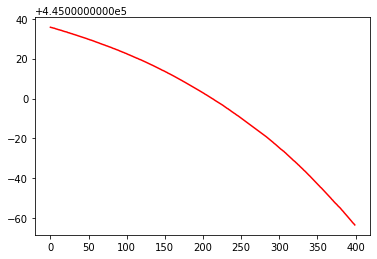

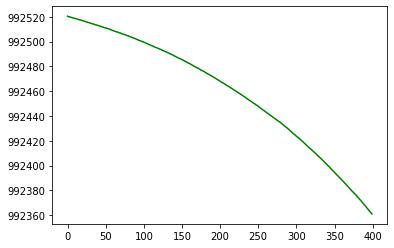

In [100]:
plt.plot(hist['mae'],color ='red')
plt.show()
plt.plot(hist['val_mae'],color ='green')
plt.show()